**Import data and Required packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data\StudentsPerformance.csv')
df.rename(columns={'race/ethnicity':'race_ethnicity','parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course', 'math score':'math_score','reading score':'reading_score','writing score':'writing_score'}, inplace=True)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [5]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [6]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [8]:
def eval_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square


In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train different models
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2_square = eval_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_square = eval_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))

    print("-------------------------------------------------")

    print("Model performance for Test set")
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))

    r2_list.append(model_test_r2_square)

    print("="*35)
    print("\n")




    

Linear Regression
Model performance for Training set
- Root Mean Square Error: 5.2409
- Mean Absolute Error: 4.1980
- R2 Score: 0.8814
-------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.7360
- Mean Absolute Error: 4.4841
- R2 Score: 0.8519


Lasso
Model performance for Training set
- Root Mean Square Error: 6.4732
- Mean Absolute Error: 5.0840
- R2 Score: 0.8190
-------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 6.9366
- Mean Absolute Error: 5.5796
- R2 Score: 0.7834


Ridge
Model performance for Training set
- Root Mean Square Error: 5.2362
- Mean Absolute Error: 4.1929
- R2 Score: 0.8816
-------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.7124
- Mean Absolute Error: 4.4630
- R2 Score: 0.8531


K-Neighbors Regressor
Model performance for Training set
- Root Mean Square Error: 5.6846
- Mean Absolute Error: 4.5500
- R2

In [19]:
results_df = pd.DataFrame(zip(model_list,r2_list), columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"], ascending=False)
results_df

,Model Name,R2 Score
2,Ridge,0.853140
0,Linear Regression,0.851927
7,CatBoosting Regressor,0.830806
5,Random Forest Regressor,0.815698
6,XGBRegressor,0.813056
8,AdaBoost Regressor,0.794051
1,Lasso,0.783450
3,K-Neighbors Regressor,0.732665
4,Decision Tree,0.687148


In [20]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred =linear_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %accuracy)

Accuracy of the model is 85.19


Text(0, 0.5, 'Predicted')

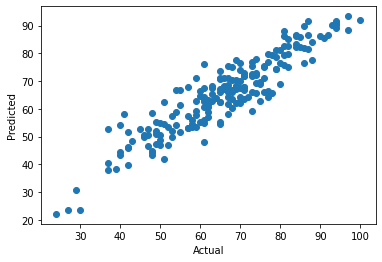

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot: xlabel='math_score'>

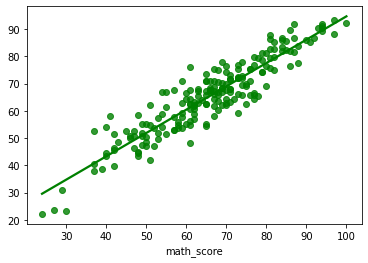

In [22]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="green")

**Difference between actual and predicted values**

In [23]:
results = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference": y_test-y_pred})
results

,Actual Value,Predicted Value,Difference
37,50,50.40625,-0.40625
726,65,70.93750,-5.93750
846,91,85.43750,5.56250
295,67,64.34375,2.65625
924,74,72.21875,1.78125
...,...,...,...
839,66,67.56250,-1.56250
810,51,42.00000,9.00000
930,67,70.96875,-3.96875
616,37,37.96875,-0.96875
